###Aim
Study the behaviour of a string grammar . 

In [1]:
%matplotlib inline
#draw stick figures
import networkx as nx

In [2]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger('root'),verbosity=1)

/Library/Python/2.7/site-packages/pygraphviz/agraph.py:1281: RuntimeWarning: Fontconfig warning: ignoring UTF-8: not a valid region tag

  warnings.warn("".join(errors),RuntimeWarning)


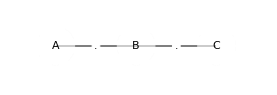

In [3]:
G=nx.path_graph(3)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g1 = G.copy()

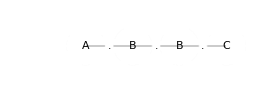

In [4]:
G=nx.path_graph(4)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g2 = G.copy()

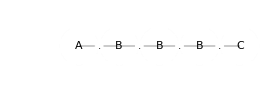

In [5]:
G=nx.path_graph(5)
G.node[0]['label']='A'
G.node[1]['label']='B'
G.node[2]['label']='B'
G.node[3]['label']='B'
G.node[4]['label']='C'
G.edge[0][1]['label']='.'
G.edge[1][2]['label']='.'
G.edge[2][3]['label']='.'
G.edge[3][4]['label']='.'

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g3 = G.copy()

In [6]:
%%time
import graphlearn.utils.draw as myutils
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g1,g2,g3,g3,g3]

sampler=gl.GraphLearnSampler(radius_list=[0,1],thickness_list=[2], complexity=2)
sampler.fit(gr,n_jobs=-1, core_interface_pair_remove_threshold=1, interface_remove_threshold=1)

CPU times: user 596 ms, sys: 218 ms, total: 813 ms
Wall time: 2.62 s


interface: 376477


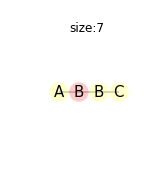

interface: 508033


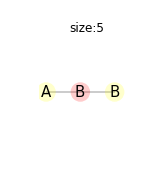

interface: 214099


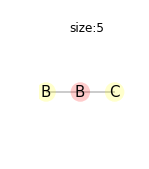

interface: 662886


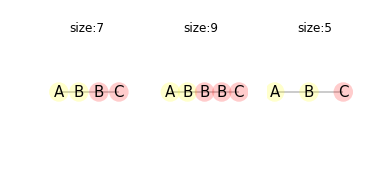

interface: 249705


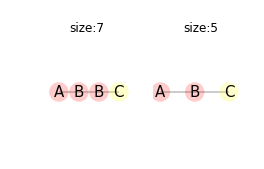

interface: 931919


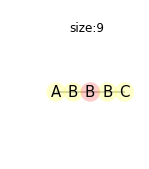

interface: 224428


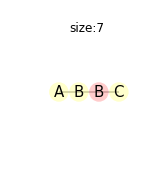

interface: 1003453


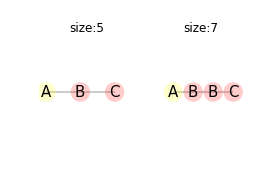

interface: 427197


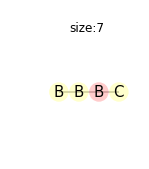

interface: 33107


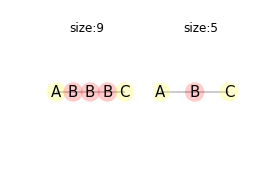

interface: 713785


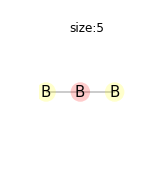

interface: 629289


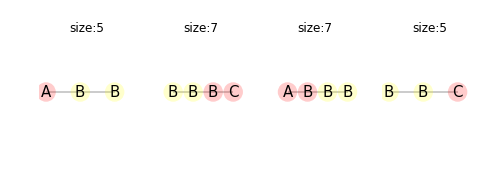

interface: 329401


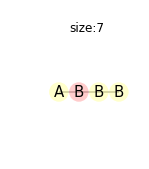

interface: 631003


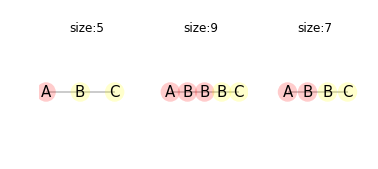

interface: 342205


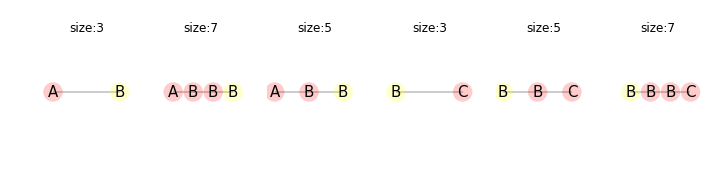

In [7]:
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=None,
                     n_graphs_per_line=7, size=2, 
                     colormap='autumn', invert_colormap=True,
                     vertex_alpha=0.2, edge_alpha=0.2, node_size=380,
                     prog='circo', size_x_to_y_ratio=3)

how often do we see interfacehashes
# productions: 30
x = # interfaces (total: 15)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


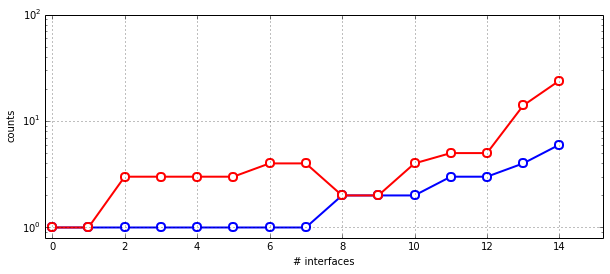

how often was this corehash seen?
x = # cores (total: 8)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


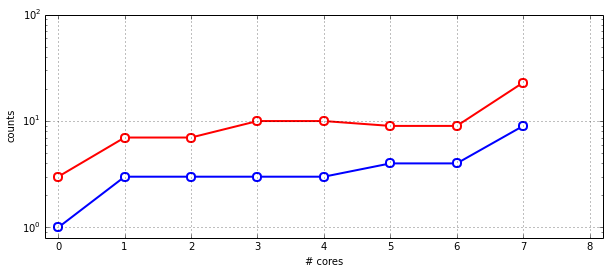

histogram
# productions: 30
distinct cores: 8 (seen on x axis)
interfaces with x many cores were observed y many times. 


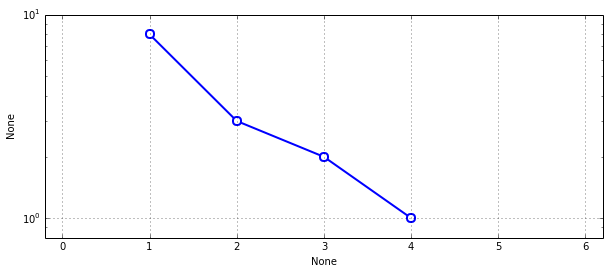

In [8]:
myutils.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar)

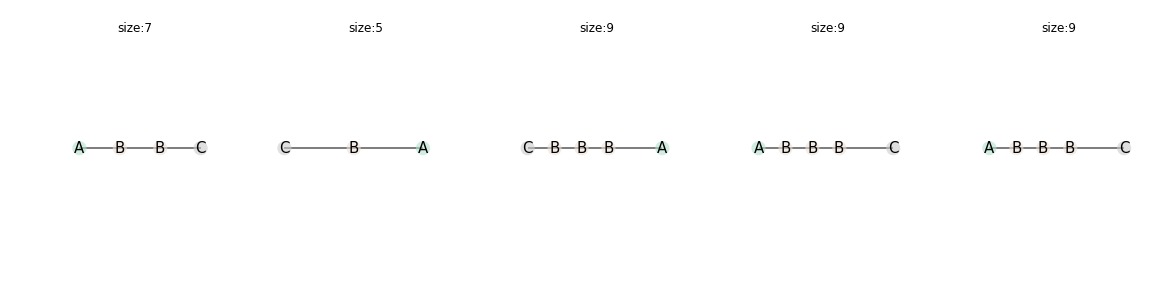

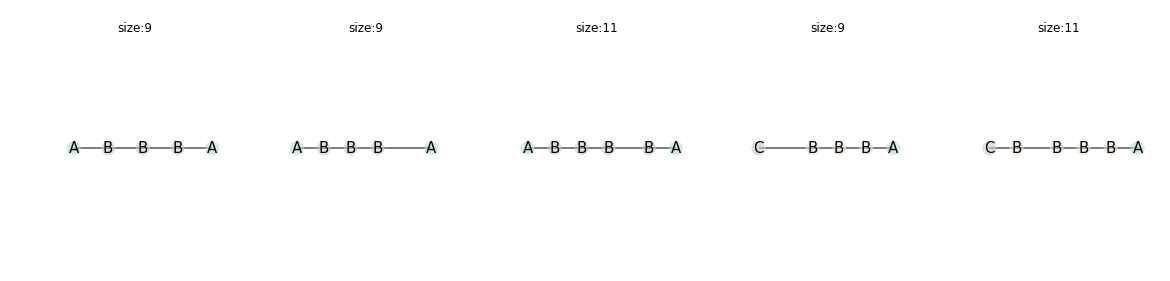

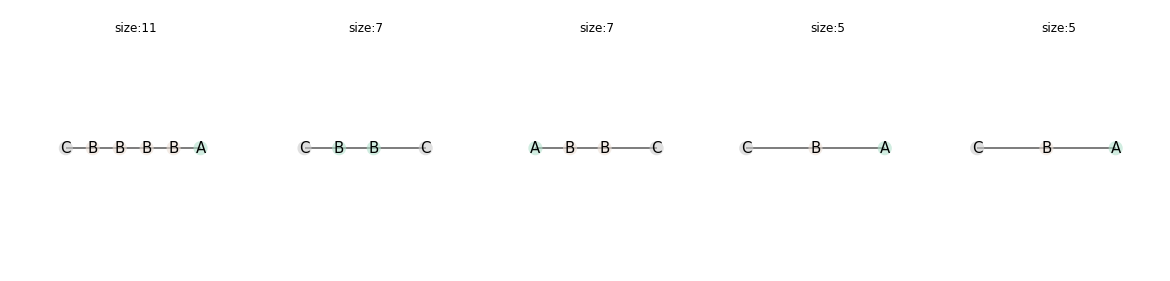

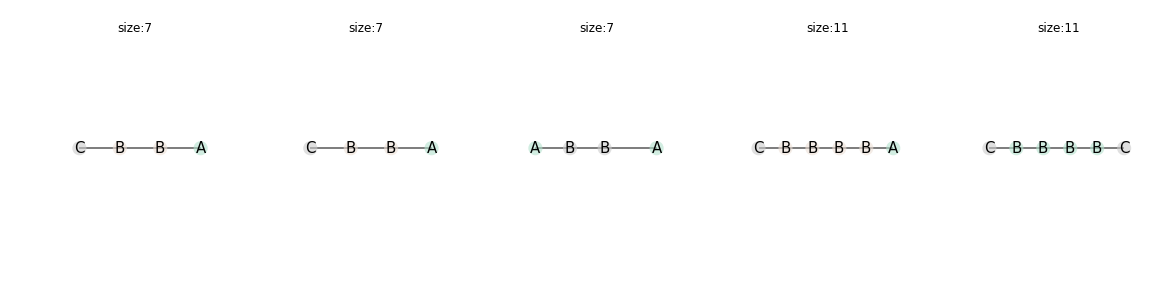

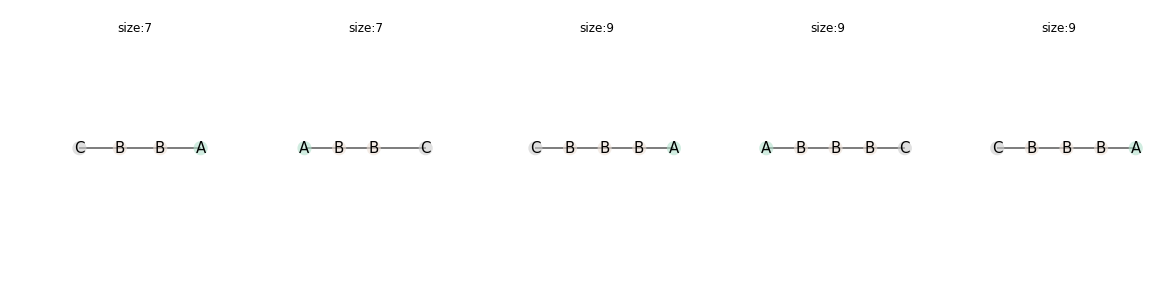

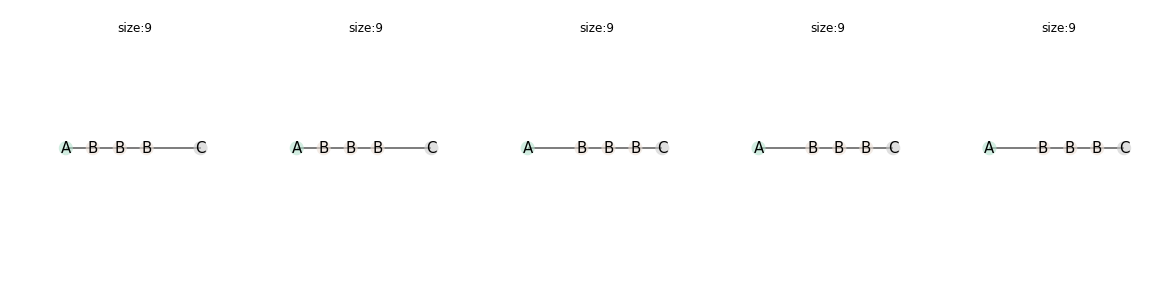

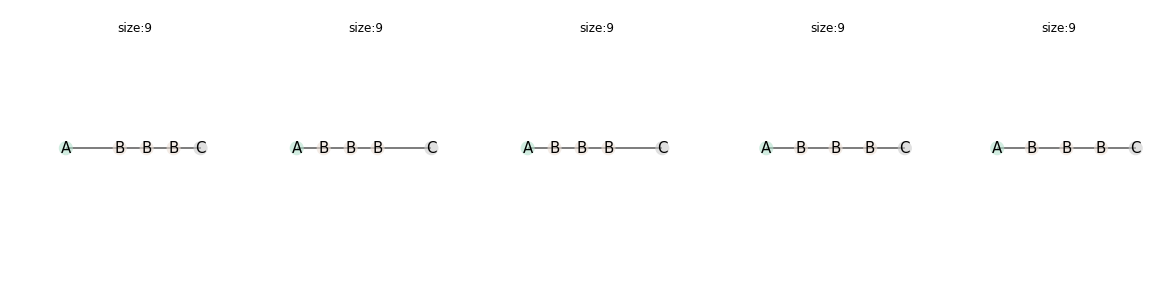

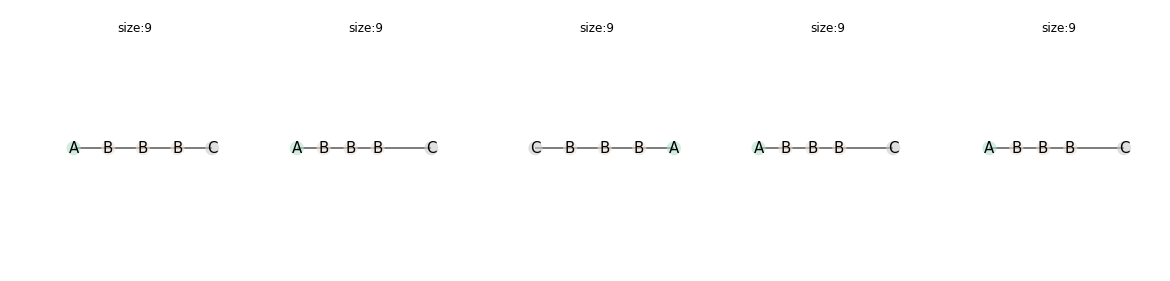

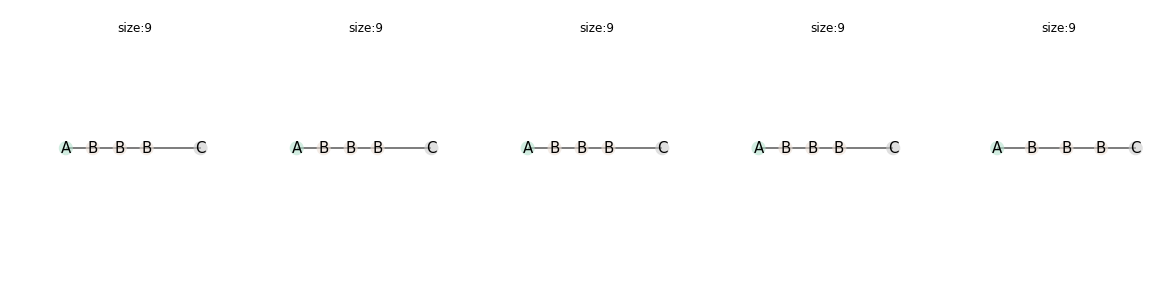

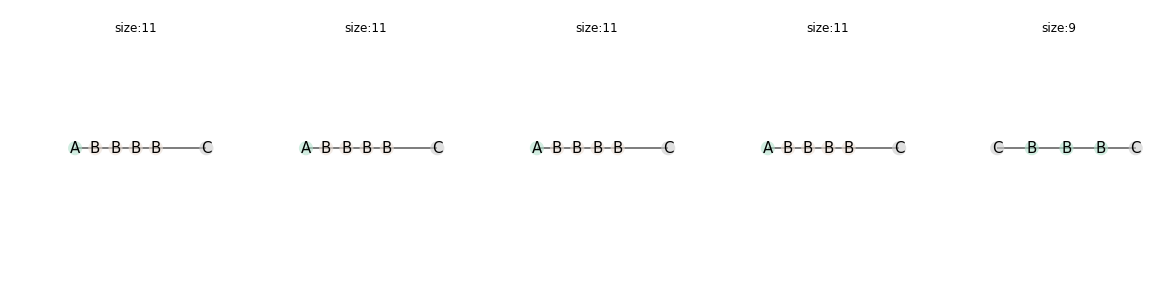

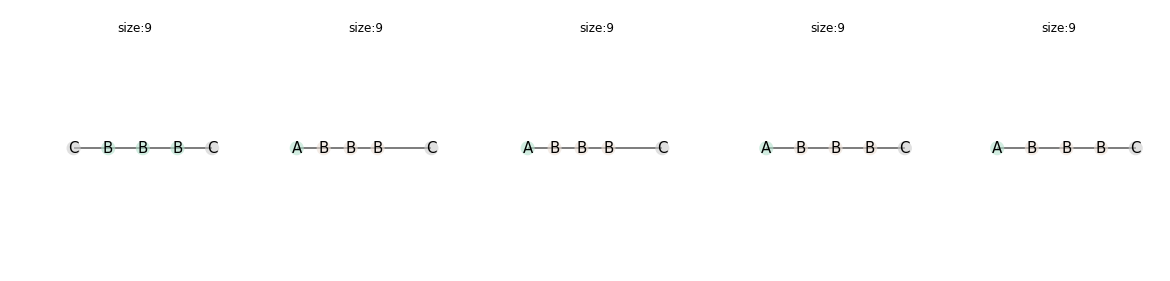

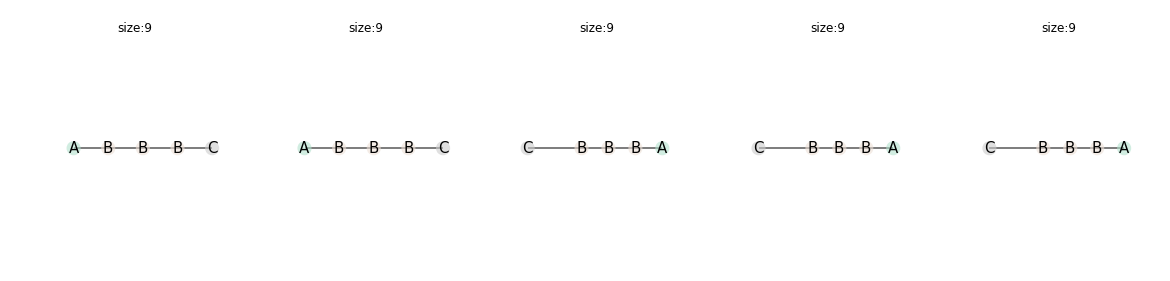

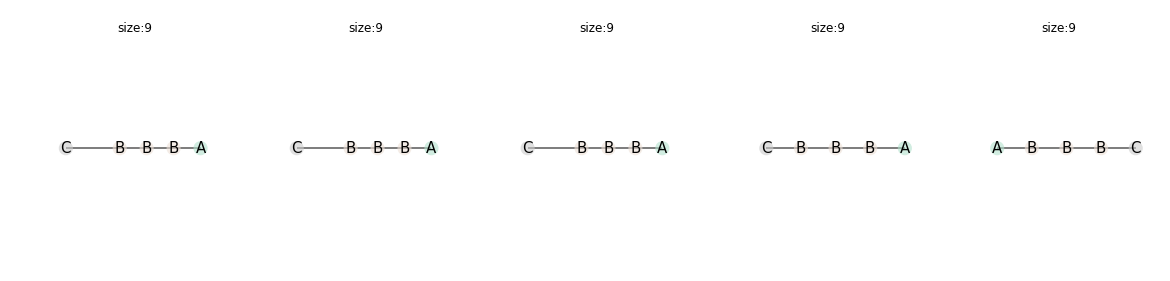

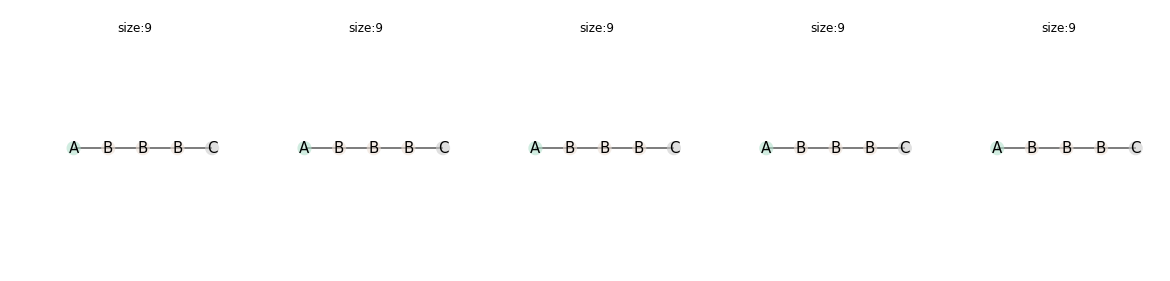

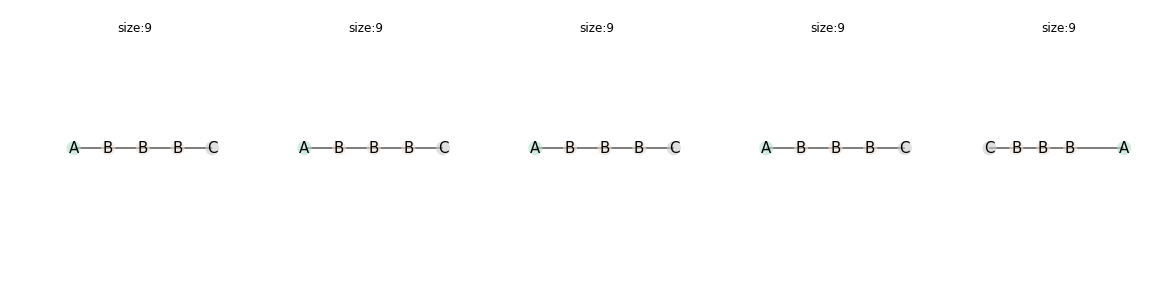

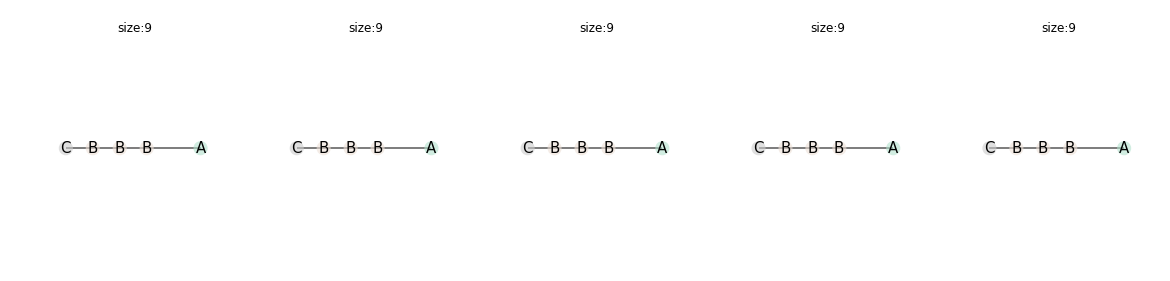

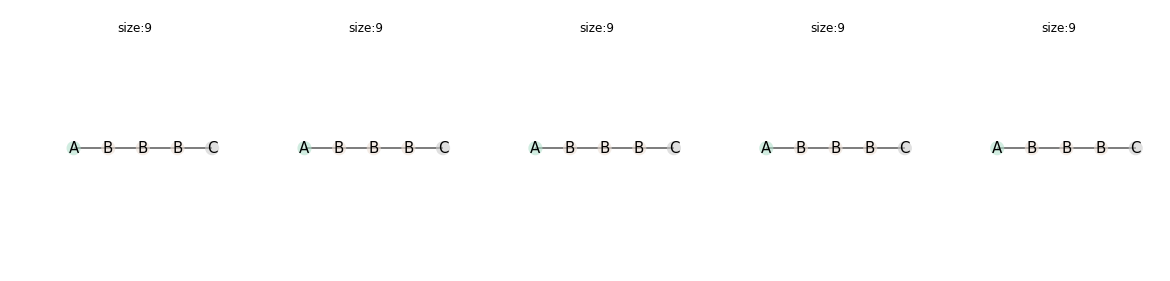

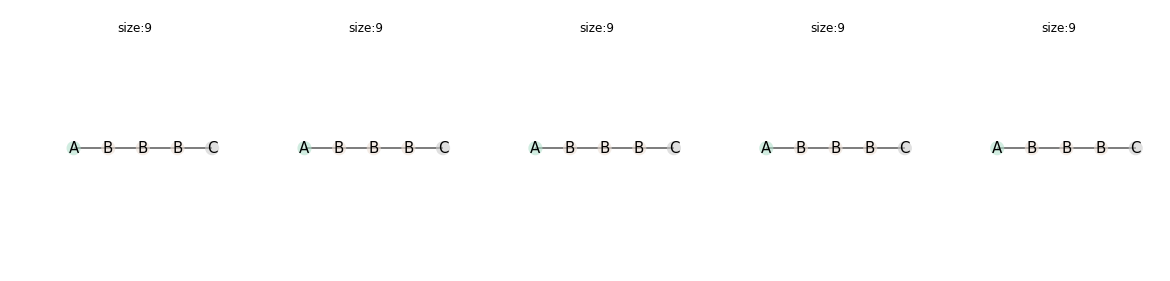

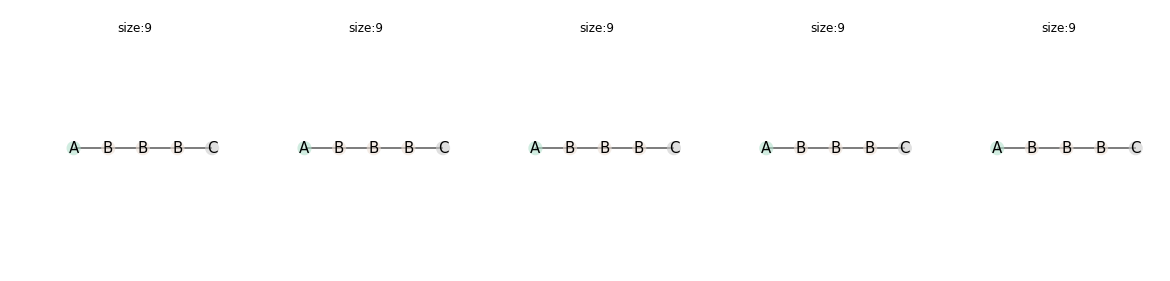

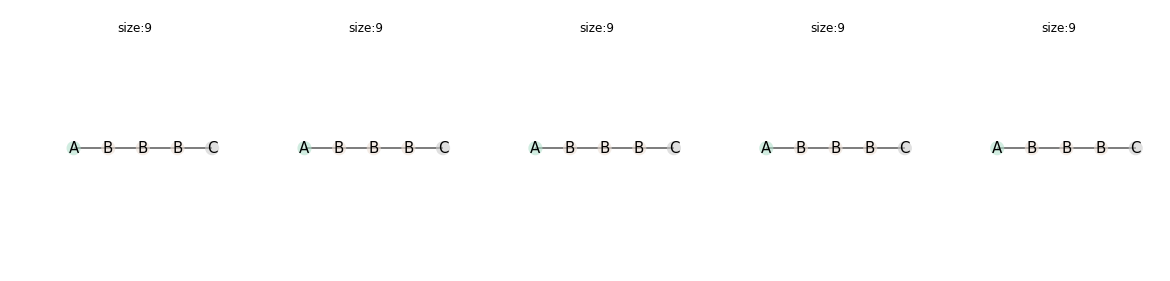

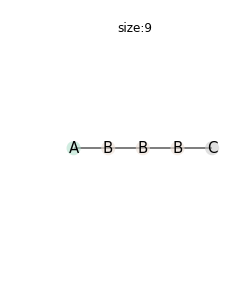

In [9]:
#sample
seed_graphs = [g2]
n_steps=10
sampling_interval=int(n_steps/10)+1
graphs = sampler.sample(seed_graphs,
                        same_radius=False,
                        same_core_size=False,
                        sampling_interval=1,
                        batch_size=1,
                        n_steps=100,
                        n_jobs=-1,
                        annealing_factor=1)
#draw
history=[]
for  i, (result,info) in enumerate(graphs):
    history.append(info['score_history'])
    myutils.draw_graph_set(info['graphs'], 
                           colormap='Pastel2', invert_colormap=True,
                           prog='circo', size_x_to_y_ratio=3, vertex_color='_labels_')

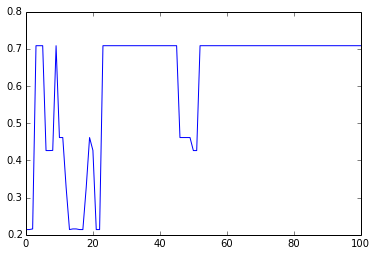

In [10]:
import matplotlib.pyplot as plt
for h in history: plt.plot(h)
plt.show()

##Note:
given that the string with more occurrences of 'b' is more frequent, then the tendency is to move towards a larger number of bs.

Note that if we keep on increasing the number of copies of one instance this becomes so popular that both the 50% least dense and the 50% more dense will contain the same number of instances and hence the direction of the signal will vanish.  